In [1]:
# set cwd ..
import os
os.chdir("..")


In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [8]:

# Create sample data
np.random.seed(42)
n_samples = 30
# Cluster 1 (dense region)
x1 = np.random.normal(loc=-2, scale=0.5, size=(n_samples//2, 2))
y1 = np.zeros(n_samples//2)
    
# Cluster 2 (dense region)
x2 = np.random.normal(loc=2, scale=0.5, size=(n_samples//2, 2))
y2 = np.ones(n_samples//2)
    
# Combine clusters
X = np.vstack([x1, x2])
y = np.hstack([y1, y2])
    
# Add sparse points in between clusters
sparse_x = np.random.uniform(low=-1, high=1, size=(n_samples//4, 2))
sparse_y = np.random.binomial(n=1, p=0.5, size=n_samples//4)

X = np.vstack([X, sparse_x]).flatten()
y = np.hstack([y, sparse_y])

# plot
plt.figure(figsize=(8, 6))
plt.plot(X[:, 0], y, "r.")
plt.grid()
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 800x600 with 0 Axes>

In [4]:
class Dataset(torch.utils.data.TensorDataset):
    def __init__(self, X: np.ndarray, y: np.ndarray) -> None:
        assert len(X) == len(y)
        self.hard_features = torch.tensor(
            X, dtype=torch.float32
        )
        self.targets = torch.tensor(
            y, dtype=torch.float32
        )

    def __len__(self) -> int:
        return len(self.hard_features)

    def __getitem__(self, idx: int) -> tuple[torch.Tensor, torch.Tensor, torch.Tensor]:
        return self.hard_features[idx], self.hard_features[idx], self.targets[idx]

In [6]:
from p2p_lending.main import train
from p2p_lending.models.deep_feed_forward_model import DeepFeedForwardModel
from p2p_lending.utils.mc_dropout import _enable_test_time_dropout

n_feats = X.shape[1]

model = DeepFeedForwardModel(n_feats, 1)

training_dataset = Dataset(X, y)
train(model, training_dataset, training_dataset)

# Sample from the posterior
model.eval()
_enable_test_time_dropout(model)
n_post = 1000
Y_post = np.zeros((n_post, X_pred.shape[0]))
with torch.no_grad():
    for i in range(n_post):
        model_pred_post = model(X_pred)
        Y_post[i] = model_pred_post.squeeze().cpu().numpy()

Epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Epochs:   0%|          | 0/30 [01:02<?, ?it/s]


AttributeError: 'NoneType' object has no attribute 'tolist'

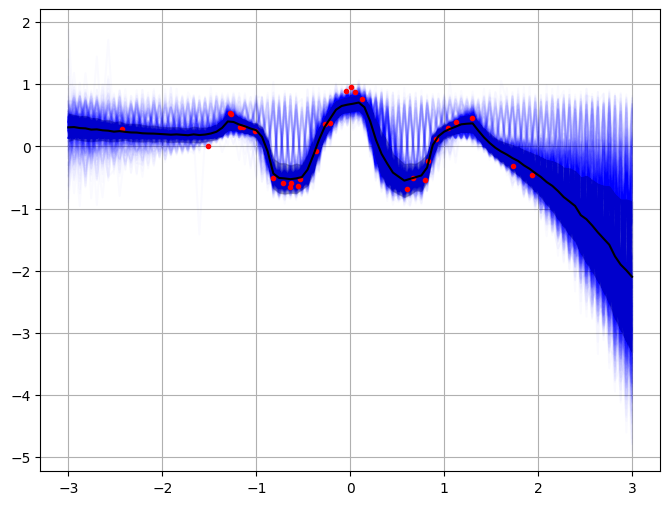

In [24]:
# Calculate the standard deviation for each value of x in Y_post
Y_post_std = np.std(Y_post, axis=0)
Y_post_mean = np.mean(Y_post, axis=0)
# Plot the results
plt.figure(figsize=(8, 6))
for i in range(n_post):
    plt.plot(X_pred_np[:, 0], Y_post[i], "b-", alpha=1.0 / 50)
plt.plot(X_np[:, 0], y_np, "r.")
plt.plot(X_pred_np[:, 0], Y_post_mean, "k-")
plt.fill_between(
    X_pred_np[:, 0],
    Y_post_mean - Y_post_std,
    Y_post_mean + Y_post_std,
    color="gray",
    alpha=0.5,
)
plt.grid()
plt.show()